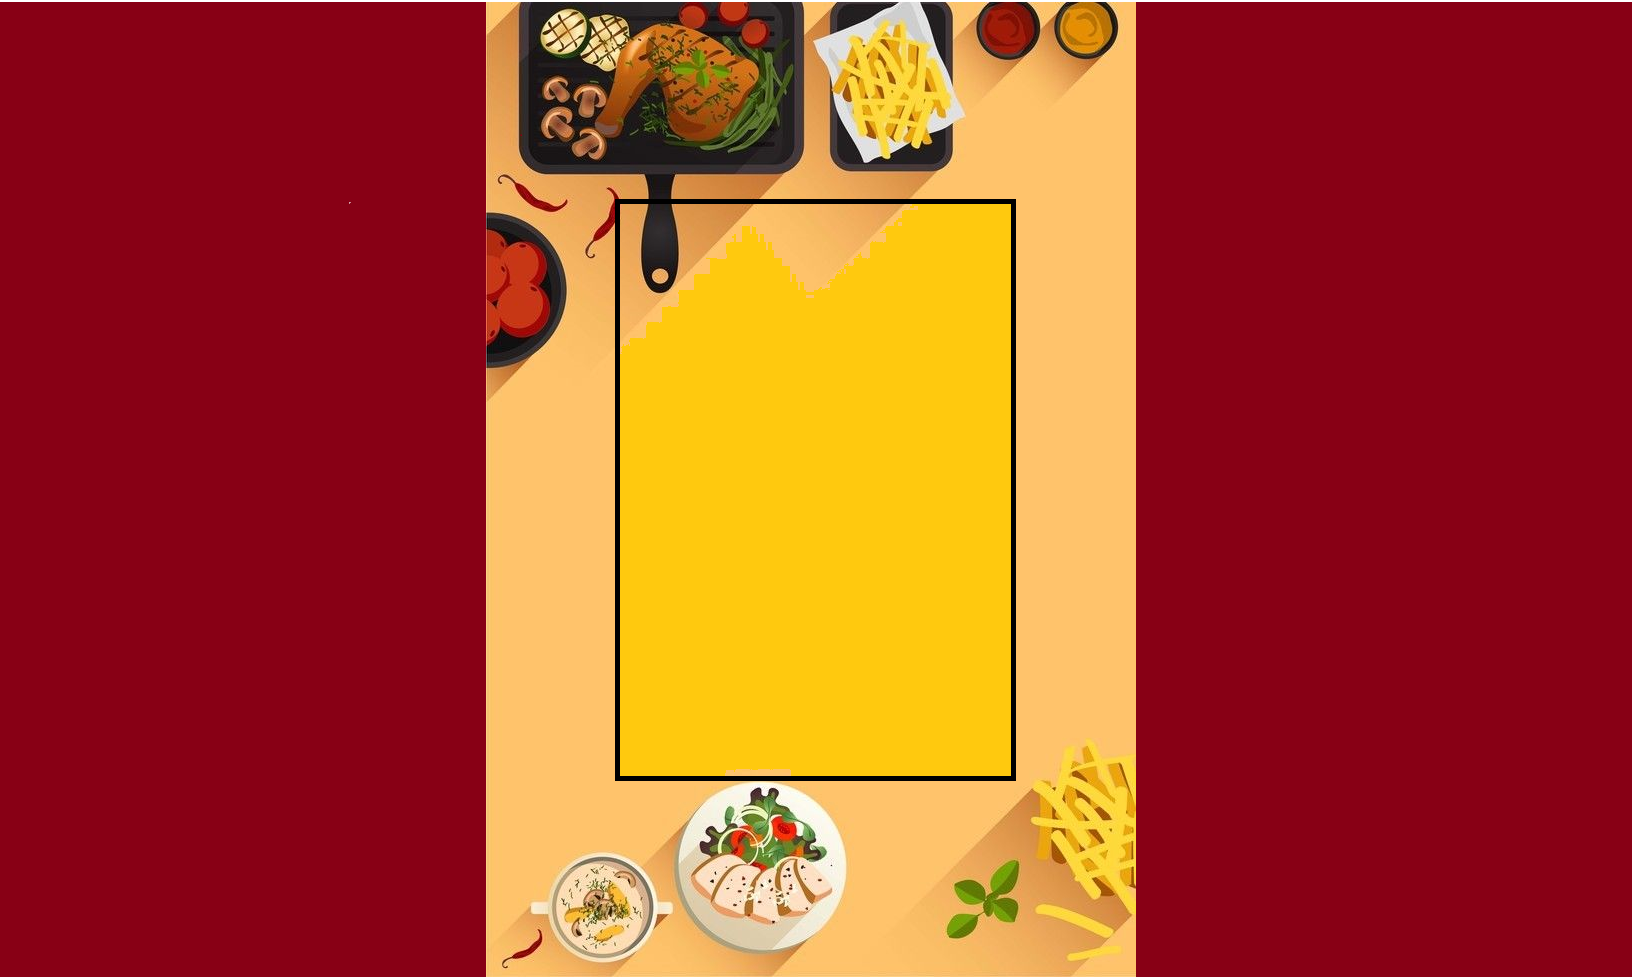

In [120]:
#!pip install Pillow
from tkinter import *
from PIL import ImageTk
from tkinter import messagebox
import pymysql

def clear():
    EmailEntry.delete(0, END)
    UsernameEntry.delete(0, END)
    PasswordEntry.delete(0, END)
    ConfirmpassEntry.delete(0, END)

def connect_database():
    if EmailEntry.get() == '' or UsernameEntry.get() == '' or PasswordEntry.get() == '' or ConfirmpassEntry.get() == '':
        messagebox.showerror('Error', 'All Fields Are Required')
    elif PasswordEntry.get() != ConfirmpassEntry.get():
        messagebox.showerror('Error', 'Mismatch password')
    elif check.get() == 0:
        messagebox.showerror('Error', 'Accept Terms & Conditions')
    else:
        try:
            con = pymysql.connect(host='localhost', user='root', password='Khushboo1286', database='login_system')
            mycursor = con.cursor()

            query = 'create table if not exists table1(id int auto_increment primary key not null, Email varchar(50), Username varchar(50), Password varchar(20))'
            mycursor.execute(query)
             
            query = 'insert into table1(Email, Username, Password) values(%s, %s, %s)'
            mycursor.execute(query, (EmailEntry.get(), UsernameEntry.get(), PasswordEntry.get()))
            con.commit()
            con.close()
            messagebox.showinfo('Success', 'Signup successful')
            clear()
            top1.destroy()
            %run Loginpage.ipynb
    
        except Exception as e:
            messagebox.showerror('Error', f'Database connectivity issue: {e}')

         
       
    
    
def loginpage():
    top1.destroy()
    %run Loginpage.ipynb

top1=Tk()
top1.title('Sign up page')

background=PhotoImage(file=r'C:\Users\khush\Downloads\background.png')
bgLabel=Label(top1,image=background)
bgLabel.grid()

frame=Frame(top1)
frame.place(x=635,y=215)

heading=Label(frame,text='CREATE AN ACCOUNT',font=('bold',23),bg='Maroon',fg='Snow')
heading.grid(row=0,column=0,padx=10,pady=10)

Email=Label(frame,text='Email',font=('bold',12),fg='black',bg='Yellow')
Email.grid(row=1,column=0,sticky='w',padx=25)

EmailEntry=Entry(frame,width=40,font=('bold',11))
EmailEntry.grid(row=2,column=0,sticky='w',padx=25)


Username=Label(frame,text='Username',font=('bold',12),fg='black',bg='Yellow')
Username.grid(row=3,column=0,sticky='w',padx=25,pady=(25,5))

UsernameEntry=Entry(frame,width=40,font=('bold',11))
UsernameEntry.grid(row=4,column=0,padx=25)

Password=Label(frame,text='Password',font=('bold',12),fg='black',bg='Yellow')
Password.grid(row=5,column=0,sticky='w',padx=25,pady=(25,5))

PasswordEntry=Entry(frame,width=40,font=('bold',11))
PasswordEntry.grid(row=6,column=0,sticky='w',padx=25)


Confirmpass=Label(frame,text='Confirm Password',font=('bold',12),fg='black',bg='Yellow')
Confirmpass.grid(row=7,column=0,sticky='w',padx=25,pady=(25,0))

ConfirmpassEntry=Entry(frame,width=40,font=('bold',11))
ConfirmpassEntry.grid(row=8,column=0,sticky='w',padx=25)
 
check=IntVar()   
Checkbutton1=Checkbutton(frame,text='I agree to the Terms & Conditions',font=('bold',12),cursor='hand2',variable=check)
Checkbutton1.grid(row=9,column=0,sticky='w',padx=25,pady=(25,35))

signupButton=Button(frame,text='SIGNUP',font=('bold'),bg='yellow',width=25,height=1,cursor='hand2',command=connect_database)
signupButton.grid(row=10,column=0)

OrLabel2=Label(frame,text='Dont have a account?' ,font=('bold',13),width=20)
OrLabel2.grid(row=11,column=0,sticky='w',padx=25,pady=(10,10))

loginButton1=Button(frame,text='Log in',font=('bold',9),width=13,fg='Maroon',command=loginpage)
loginButton1.place(x=205,y=466)

top1.mainloop()
